## Imports
Execute the cell below to import all packages needed.

In [1]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import matplotlib.image as mpimg
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io

## Load csv into pandas dataframe

In [2]:
path__tweets_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_lon_all.csv'
path_users_csv = '/home/stelios/Desktop/Honours Project/Samples/user_data/lon.csv'

lon_tweets_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str)
lon_users_df = pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str)

lon_join_df = lon_tweets_df.join(lon_users_df.set_index('user_id'), on='user_id')

## Extract, Count & Sort Emojis for all

In [3]:
extract = Extractor()

count = extract.count_all_emoji(lon_join_df['text'])

# Display most common
#count.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df.tail(20)

,Emoji,Count
52,💙,5224
33,😅,6049
25,😁,7146
0,😉,7402
34,🎉,7477
217,💕,7961
57,🙄,8248
53,👀,8372
28,🤔,8532
88,👍,9408


## Top 15 Emojis Graph

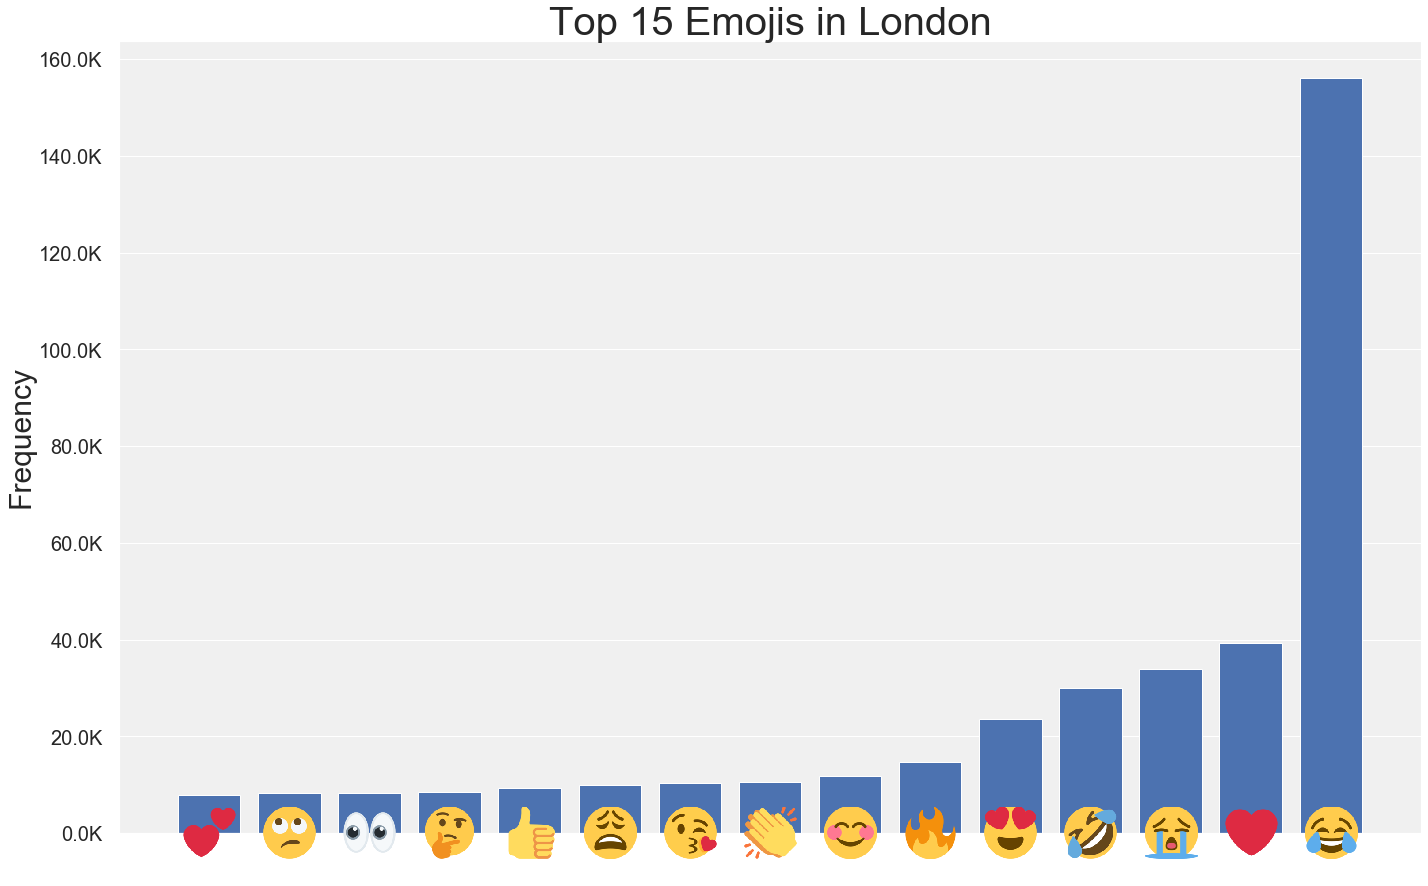

In [4]:
# Top 15 Values
x = emojis_count_df['Emoji'].tail(15).values
y = emojis_count_df['Count'].tail(15).values

# Millions Formatter Function
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x*1e-3)

# Create a formatter
formatter_millions = FuncFormatter(millions)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_millions)
ax.tick_params(axis='both', which='major', pad=10)
ax.set_facecolor('#0F0F0F0F')
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
ax.get_xaxis().set_visible(False)
#plt.xticks(x, fontproperties=emojis_font)  Old method
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis in London', fontsize =40)
plt.tight_layout()

# Set sizes of figure and images
ax_width = ax.get_window_extent().width
fig_width = fig.get_window_extent().width
fig_height = fig.get_window_extent().height
img_size = ax_width/(fig_width*len(x_linespace))
img_axs = [None for i in range(len(x_linespace))]


# Display emojis pngs on x-axis
for i in range(len(x)):
    loc = ax.transData.transform((x_linespace[i], 0))      # Optimize y manually 
    img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                               img_size, img_size], anchor='C')
    
    # Platform 5 = Twitter
    img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
    img_axs[i].axis("off")

plt.show()

## Extract, Count & Sort Emojis for females

In [5]:
# Count emojis (Gender Confidence =1)
count_females = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['gender'] == 'female')& (lon_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_females_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_females:
    emojis_count_females_df = emojis_count_females_df.append({'Emoji' : emoji , 'Count' : count_females[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_females_df = emojis_count_females_df.sort_values(by=['Count'])
emojis_count_females_df.tail(20)

,Emoji,Count
55,💙,1835
219,💛,1849
40,👏,1865
100,💜,1899
11,😁,1943
293,👏🏾,2126
160,💖,2428
241,✨,2462
84,🙄,2658
35,🎉,2991


## Extract, Count & Sort Emojis for males

In [6]:
# Count emojis (Gender Confidence =1)
count_males = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['gender'] == 'male')& (lon_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_males_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_males:
    emojis_count_males_df = emojis_count_males_df.append({'Emoji' : emoji , 'Count' : count_males[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_males_df = emojis_count_males_df.sort_values(by=['Count'])
emojis_count_males_df.tail(20)

,Emoji,Count
116,😀,1202
106,😆,1270
9,🎉,1381
391,🙌🏾,1444
28,😉,1558
114,😁,1614
247,😩,1689
37,🙄,1814
133,💯,1828
26,😊,1965


## Top 15 Emojis Graph by Gender

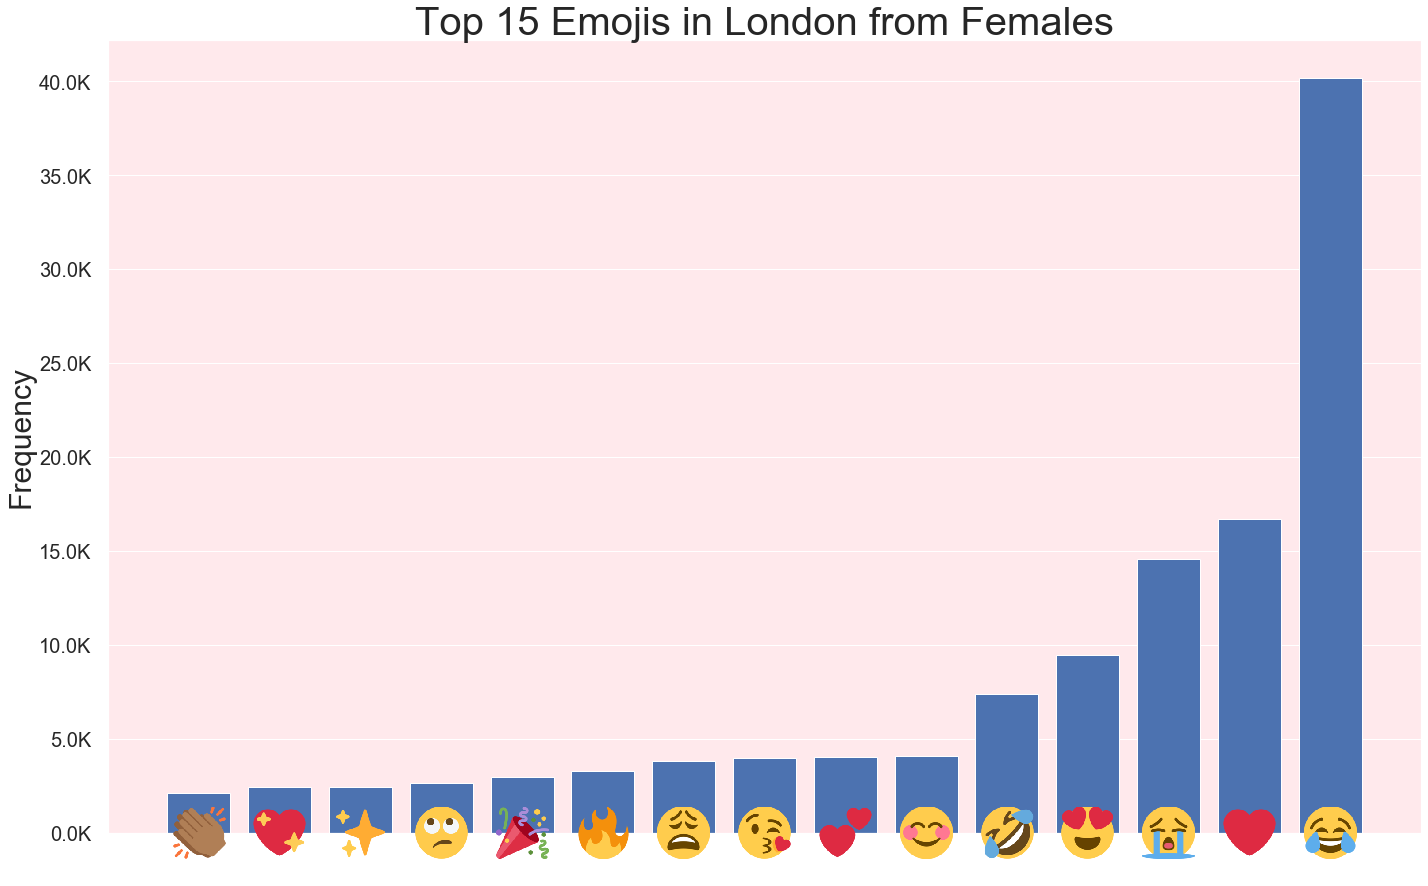

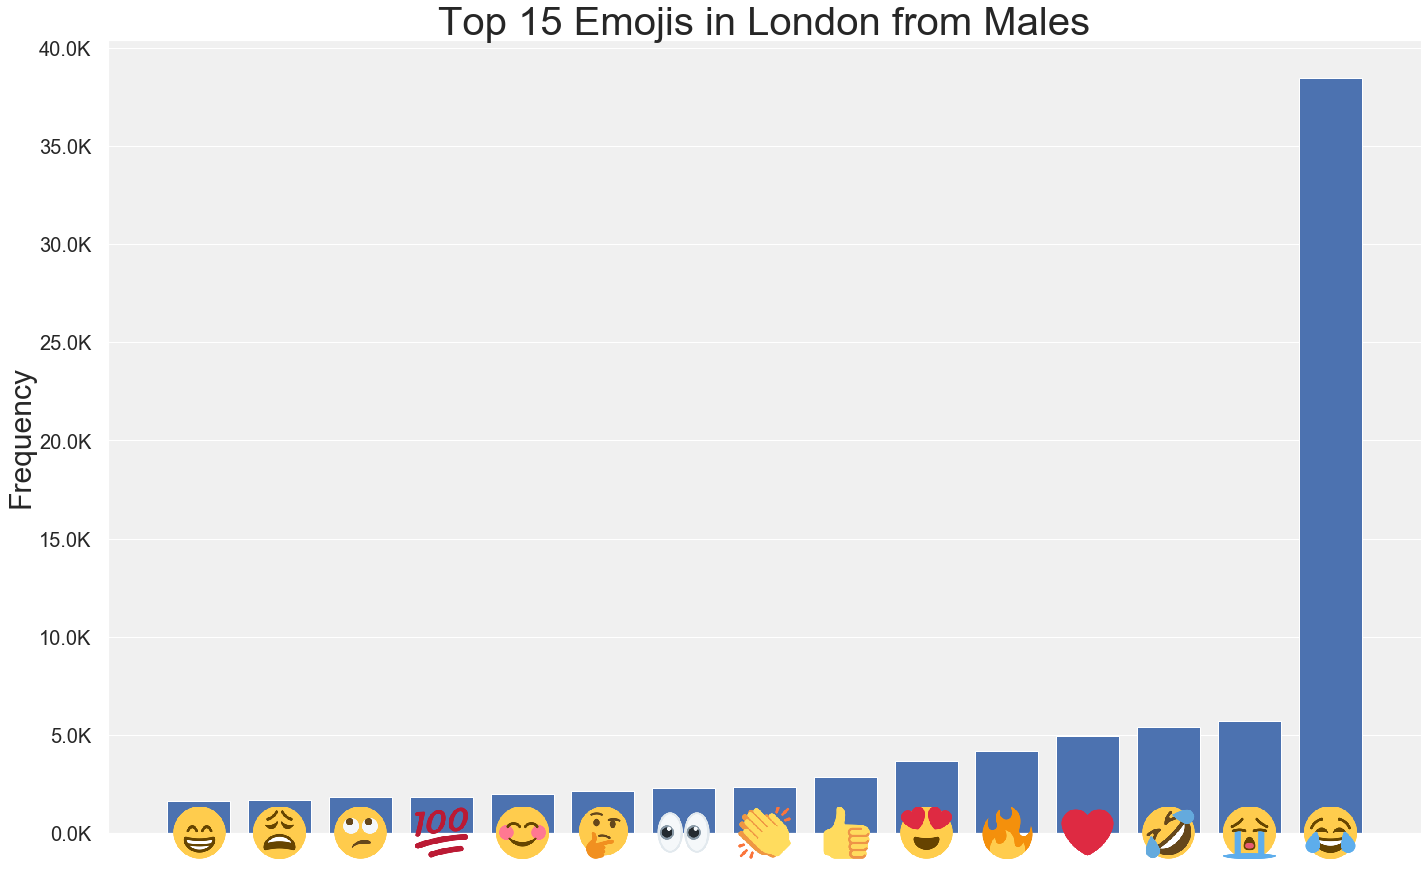

In [7]:
gender_list = ['Females','Males']
gender_values =[emojis_count_females_df,emojis_count_males_df]
gender_graph_colours=['ffe9ec','0F0F0F0F']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x = gender_values[ind]['Emoji'].tail(15).values
    y = gender_values[ind]['Count'].tail(15).values

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_millions)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in London from {}'.format(gender_list[ind]), fontsize =40)
    plt.tight_layout()

    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]


    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0)) # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

    plt.show()

## Extract, Count & Sort Emojis for White Ethnicity

In [8]:
# Count emojis (Ethnicity Confidence: 0.8)
count_white = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] == 'white')& (lon_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_white_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_white:
    emojis_count_white_df = emojis_count_white_df.append({'Emoji' : emoji , 'Count' : count_white[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_white_df = emojis_count_white_df.sort_values(by=['Count'])
emojis_count_white_df.tail(20)

,Emoji,Count
64,🙌,1651
51,😎,1691
33,👀,1695
347,✨,2105
1,🤔,2326
71,😁,2421
28,😉,2541
9,🎉,2707
37,🙄,2710
160,💕,3254


## Extract, Count & Sort Emojis for Black Ethnicity

In [9]:
# Count emojis (Ethnicity Confidence: 0.8)
count_black = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] == 'black')& (lon_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_black_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_black:
    emojis_count_black_df = emojis_count_black_df.append({'Emoji' : emoji , 'Count' : count_black[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_black_df = emojis_count_black_df.sort_values(by=['Count'])
emojis_count_black_df.tail(20)

,Emoji,Count
177,🎧,905
194,💜,947
56,🎉,1056
61,🤔,1058
87,🙏🏾,1158
20,😊,1218
78,😘,1286
11,😅,1362
40,🙄,1384
4,👀,1666


## Extract, Count & Sort Emojis for Hispanic Ethnicity

In [10]:
# Count emojis (Ethnicity Confidence: 0.8)
count_hispanic = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] == 'hispanic')& (lon_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_hispanic_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_hispanic:
    emojis_count_hispanic_df = emojis_count_hispanic_df.append({'Emoji' : emoji , 'Count' : count_hispanic[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_hispanic_df = emojis_count_hispanic_df.sort_values(by=['Count'])
emojis_count_hispanic_df.tail(20)

,Emoji,Count
53,🙃,4
6,👇🏼,4
34,❤,4
5,🙌🏼,4
68,😭,5
49,👋🏼,5
101,😪,6
15,😡,7
48,🚮,8
82,🙏,8


## Extract, Count & Sort Emojis for Asian Ethnicity

In [11]:
# Count emojis (Ethnicity Confidence: 0.8)
count_asian = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] == 'asian')& (lon_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_asian_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_asian:
    emojis_count_asian_df = emojis_count_asian_df.append({'Emoji' : emoji , 'Count' : count_asian[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_asian_df = emojis_count_asian_df.sort_values(by=['Count'])
emojis_count_asian_df.tail(20)

,Emoji,Count
98,🎉,31
95,😪,31
67,💗,31
233,🙄,32
93,🙆‍♀️,33
69,💖,34
4,🤙🏻,37
20,😡,39
70,🤡,46
12,💕,51


## Top 15 Emojis Graph by Ethnicity

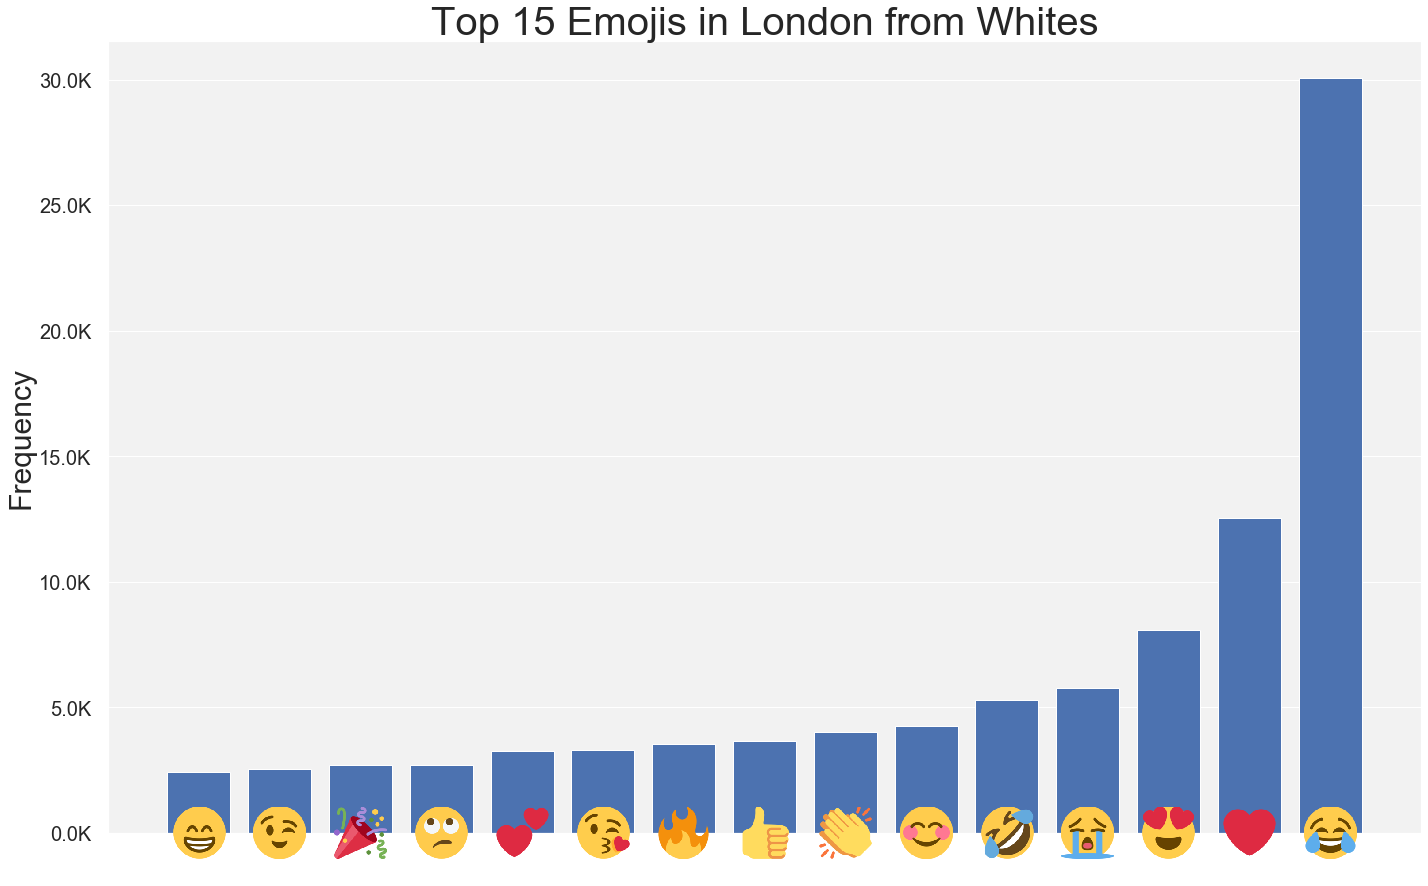

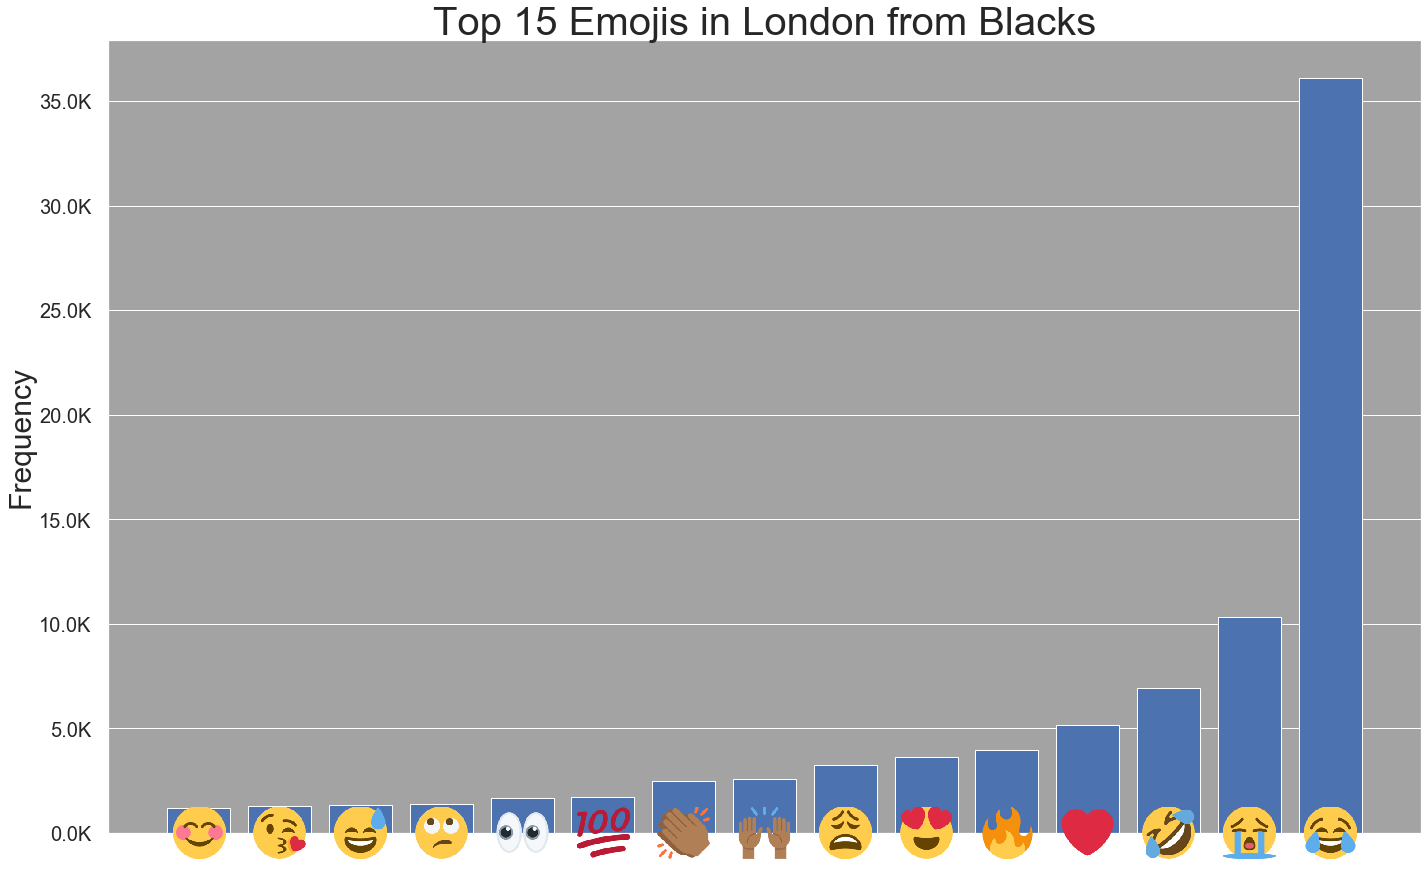

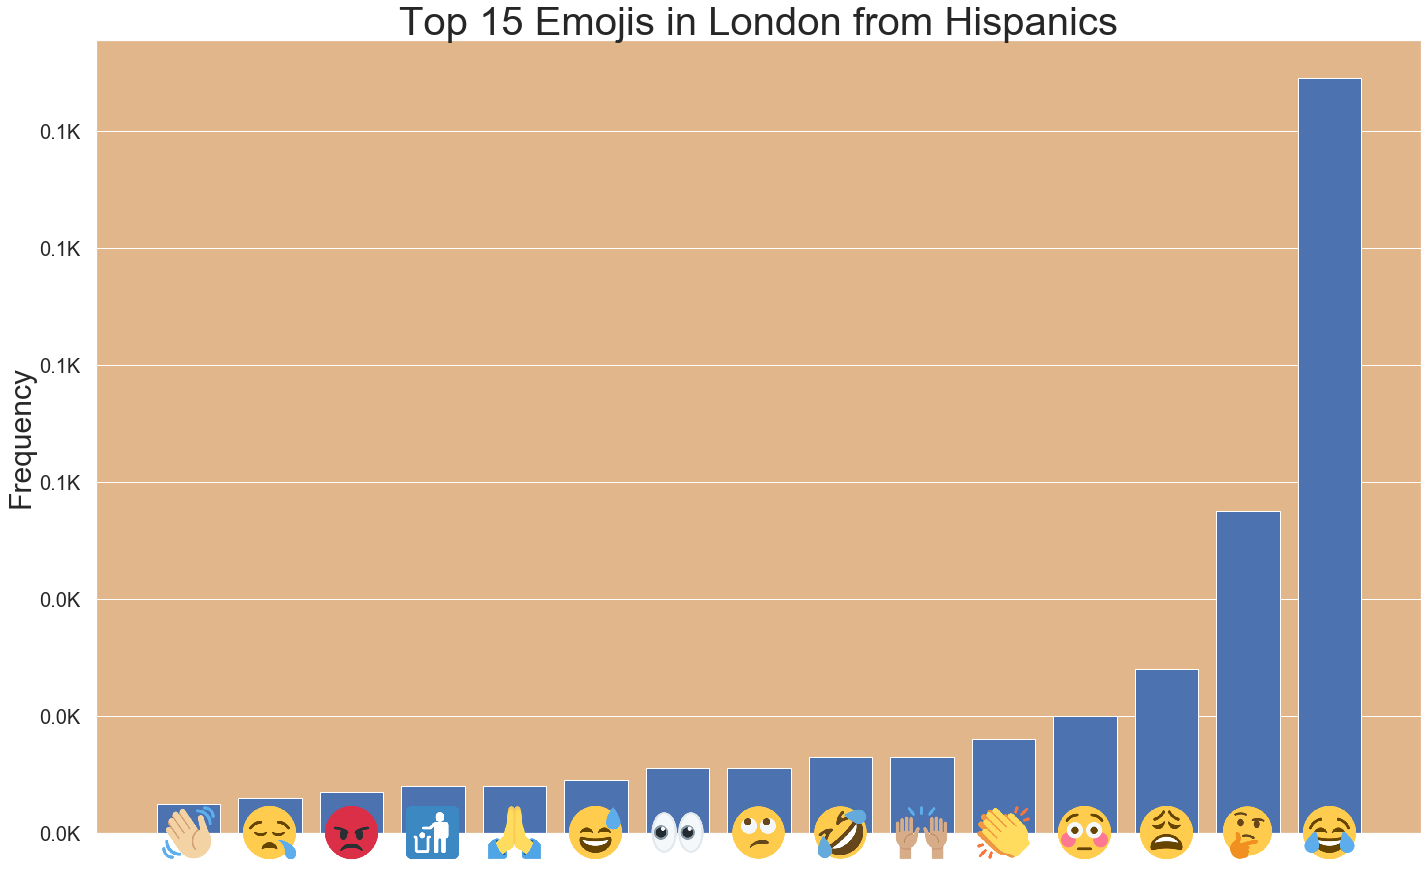

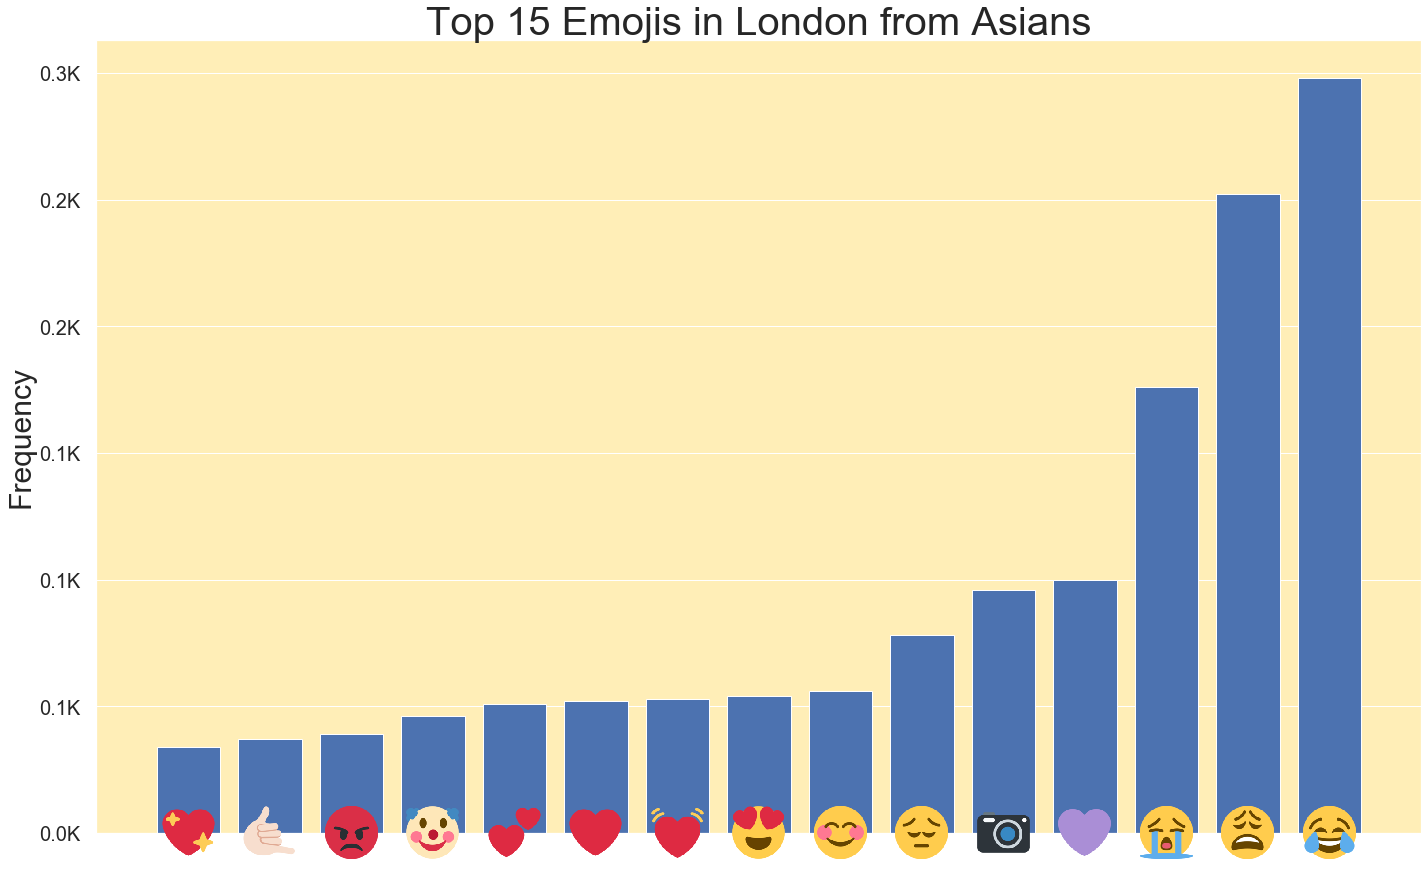

In [12]:
ethnicities_list = ['Whites','Blacks','Hispanics','Asians']
ethnicities_values =[emojis_count_white_df,emojis_count_black_df,emojis_count_hispanic_df,emojis_count_asian_df]
ethnicities_graph_colours=['f2f2f2','a3a3a3','e1b68b','ffeeb7']

for ind,ethn in enumerate(ethnicities_list):

     # Top 15 Values
    x = ethnicities_values[ind]['Emoji'].tail(15).values
    y = ethnicities_values[ind]['Count'].tail(15).values

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_millions)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(ethnicities_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in London from {}'.format(ethnicities_list[ind]), fontsize =40)
    plt.tight_layout()

    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]


    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0)) # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

    plt.show()